## Galactic Extinction

Trace the galactic extinction towards a field using , e.g., the GAIA A_g

In [1]:
using PyCall
using Distributions
using Statistics

using Distances
using Random , Formatting
using AstroLib
using TSne

rootdir = "/home/stephane/Science/GAIA"

push!(LOAD_PATH,"$rootdir/master/src")
using GaiaClustering

import PyPlot

@pyimport astroquery.vizier as vizier
@pyimport astropy.units as u
@pyimport astropy.coordinates as coord
@pyimport matplotlib.tri as tri

mutable struct A_G 
    lgal::Array{Float64}
    bgal::Array{Float64}
    ag::Array{Float64}
end

## directory
wdir    = "$rootdir/products"
plotdir = "$rootdir/products/test"

cd(wdir)

In [2]:
## Get the galactic extinction from the GAIA data
function _get_AG(voname)::A_G
    data       = read_votable(voname)
    ngaia = length(data)
    
    lgal = zeros(ngaia)
    bgal = zeros(ngaia) 
    ag   = zeros(ngaia)
    
    for i in 1:ngaia
        lgal[i]     = convert(Float64,data[i]["l"])
        bgal[i]     = convert(Float64,data[i]["b"])
        ag[i]       = convert(Float64,data[i]["a_g_val"])
    end
    
    i1 =  ag .>= 0.

    nag = length(ag[i1])
    res = A_G(lgal[i1], bgal[i1], ag[i1])
    
    return(res)
end

_get_AG (generic function with 1 method)

In [3]:
## plot of the A_V

function plot_AG(ag::A_G)
    PyPlot.plt[:figure](figsize=(8.0,8.0))
    PyPlot.plt[:subplot](1,1,1)
    
    xx = ag.lgal
    yy = ag.bgal
    zz = ag.ag
    triang = tri.Triangulation(xx, yy)
    println(triang)
    
    ax = PyPlot.gca()
    ax[:scatter](ag.lgal,ag.bgal , s = 1.0 )
    ax[:tricontour](triang, zz , levels = [1.0,1.5])
    
        
    PyPlot.show()
    
end

plot_AG (generic function with 1 method)

## Extracting the extinction A_G (mag)...
## Votable test.vot read


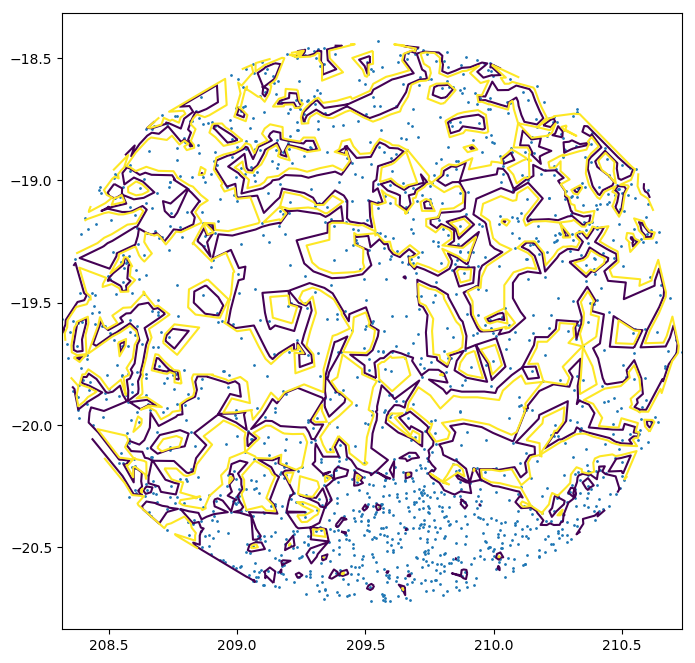

PyObject <matplotlib.tri.triangulation.Triangulation object at 0x7f772789e2b0>


In [4]:
macro main(voname)
    Random.seed!(1237)
    println("## Extracting the extinction A_G (mag)...")
    
    ag = _get_AG(voname)
    plot_AG(ag)
    
end


@main("test.vot")